In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\User\AppData\Local\Temp\25f0a2c3-f08f-4897-950a-382adff75ccd_archive.zip.ccd\amz_uk_price_prediction_dataset.csv')
df. head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


Crosstab Analysis

In [4]:
import pandas as pd

# Create a crosstab between product category and isBestSeller
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calculate proportion of best-sellers for each category
crosstab['BestSeller Proportion'] = crosstab.loc[:, True] / crosstab.sum(axis=1)  # Assuming '1' indicates a best-seller

# Sort categories by the proportion of best-sellers
sorted_crosstab = crosstab.sort_values('BestSeller Proportion', ascending=False)

print(sorted_crosstab)

isBestSeller                      False  True  BestSeller Proportion
category                                                            
Grocery                            9008   556               0.058135
Smart Home Security & Lighting       98     6               0.057692
Health & Personal Care             9017   552               0.057686
Mobile Phone Accessories            248    11               0.042471
Power & Hand Tools                 8353   306               0.035339
...                                 ...   ...                    ...
CD, Disc & Tape Players            8798     0               0.000000
General Music-Making Accessories    259     0               0.000000
Snowboard Boots                    1449     0               0.000000
Boxes & Organisers                  911     0               0.000000
eBook Readers & Accessories         246     0               0.000000

[296 rows x 3 columns]


 Statistical Tests

In [5]:
from scipy.stats import chi2_contingency

# Perform Chi-square test
chi2, p, dof, ex = chi2_contingency(crosstab)

print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-square Statistic: 36684.23786636857
P-value: 0.0


A small p-value (typically ≤ 0.05) indicates there is a significant relationship between product categories and best-seller status.

Cramér's V:

In [6]:
import numpy as np

# Calculate Cramér's V
n = crosstab.sum().sum()  # Total number of observations
cramer_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
print(f"Cramér's V: {cramer_v}")

Cramér's V: 0.08663731815334759


 Cramér's V ranges from 0 to 1, where 0 indicates no association, and 1 indicates a perfect association.

<Figure size 1400x800 with 0 Axes>

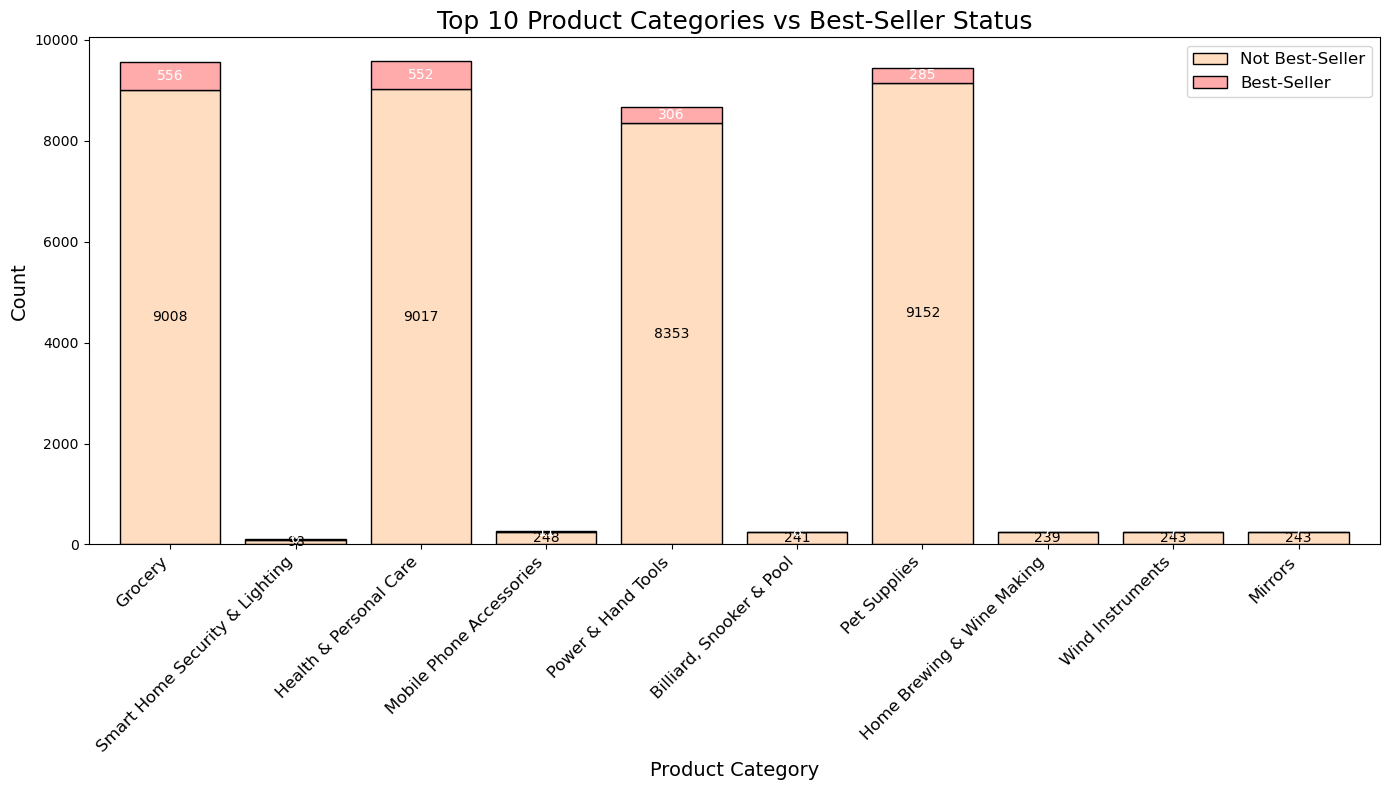

In [7]:


import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'category' and 'isBestSeller' exist in df and are correctly formatted
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calculate proportion of best-sellers for each category
crosstab['BestSeller Proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Sort categories by the proportion of best-sellers and take the top 10
top_10_crosstab = crosstab.sort_values('BestSeller Proportion', ascending=False).head(10)

# Drop the proportion column for plotting
top_10_crosstab = top_10_crosstab.drop(columns='BestSeller Proportion')

# Plotting
plt.figure(figsize=(14, 8))
top_10_crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=['#FFDDC1', '#FFABAB'],
    width=0.8,
    edgecolor='black'
)

# Titles and labels
plt.title('Top 10 Product Categories vs Best-Seller Status', fontsize=18)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Legend with better readability
plt.legend(['Not Best-Seller', 'Best-Seller'], loc='upper right', fontsize=12)

# Adjust x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add value annotations on each section of the stacked bars for clarity
for i, (not_bests, bests) in enumerate(zip(top_10_crosstab[False], top_10_crosstab[True])):
    plt.text(i, not_bests / 2, str(not_bests), ha='center', va='center', fontsize=10, color='black')
    plt.text(i, not_bests + bests / 2, str(bests), ha='center', va='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

Preliminary Step: Remove Outliers in Product Prices

In [8]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers from the dataset
df_no_outliers = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

Violin Plots: Price Distribution Across Categories

C:\Users\User\AppData\Local\Temp\ipykernel_2016\3105350603.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20, x='category', y='price', inner='quartile', palette='muted')


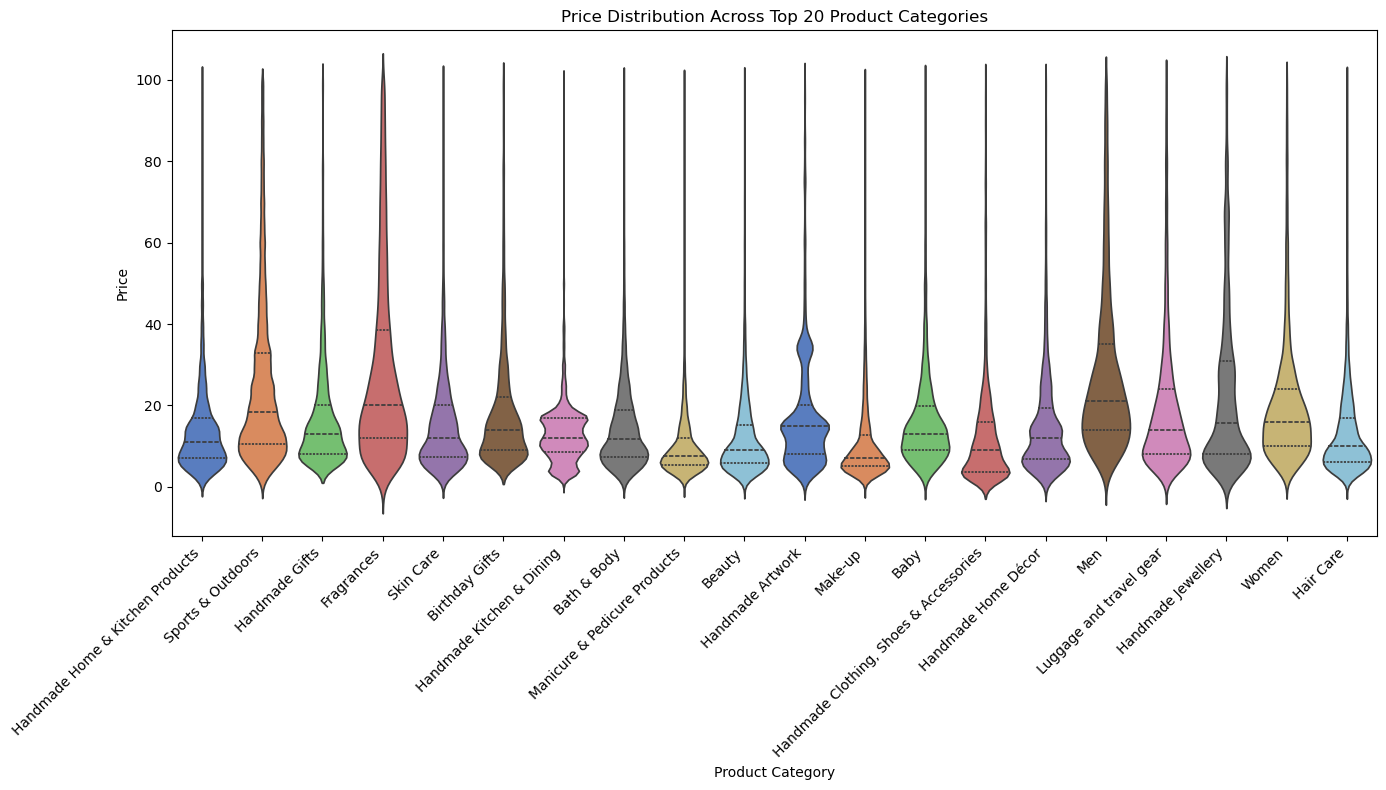

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for the top 20 categories by count
top_20_categories = df_no_outliers['category'].value_counts().head(20).index
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top_20, x='category', y='price', inner='quartile', palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

Bar Charts: Average Price for Top 10 Categories

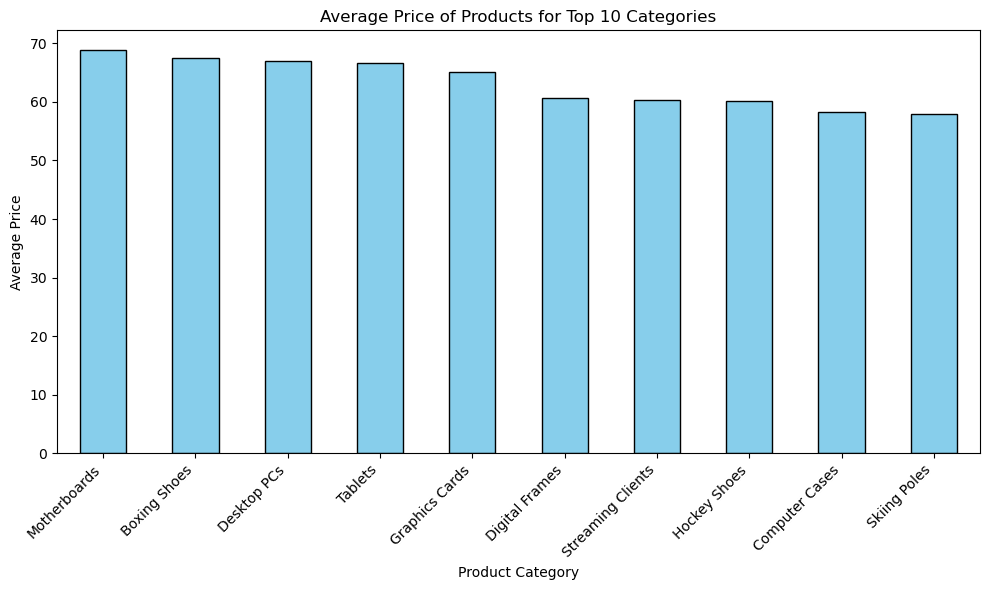

In [10]:
avg_price_top_10 = df_no_outliers.groupby('category')['price'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
avg_price_top_10.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price of Products for Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2016\340929102.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_stars_top_10, x='category', y='stars', palette='muted')


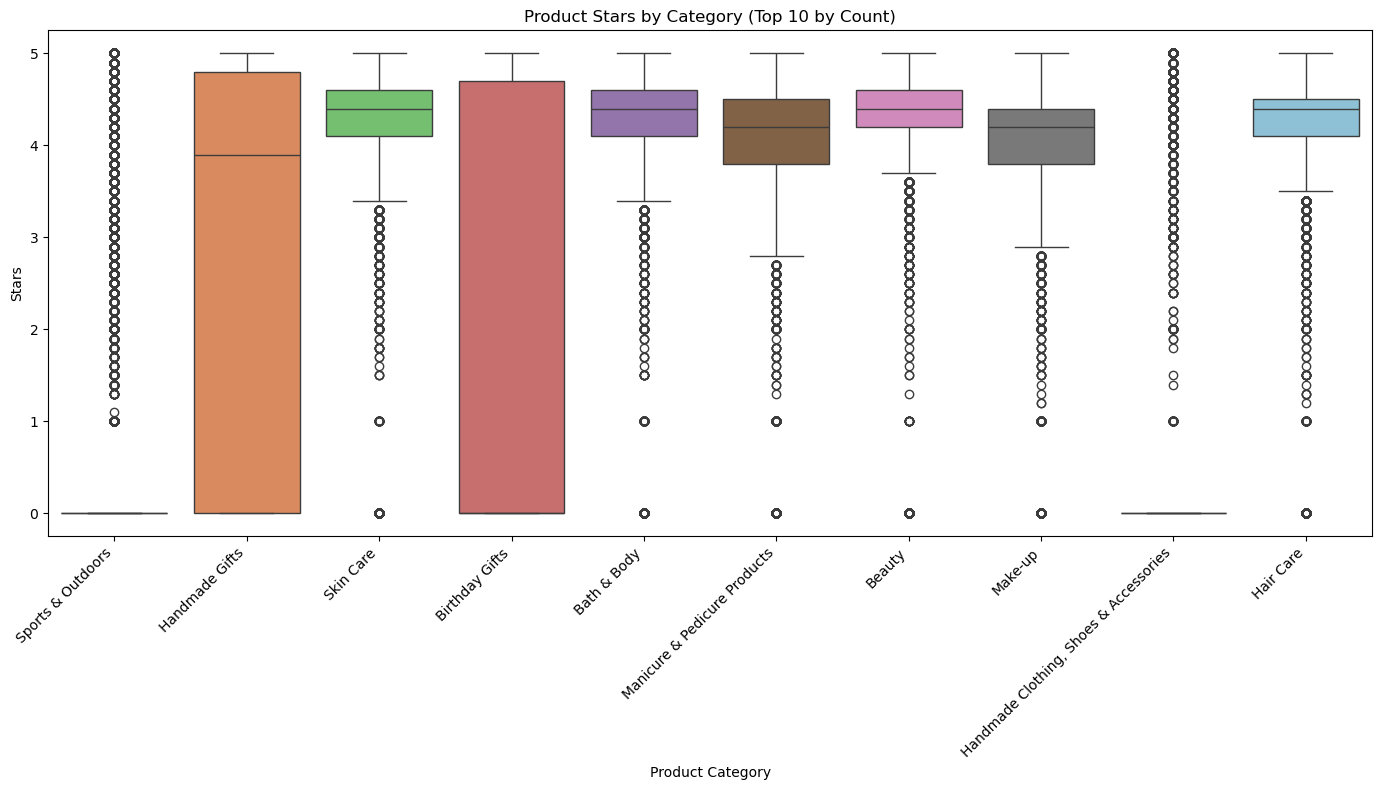

In [11]:


import matplotlib.pyplot as plt
import seaborn as sns

# Filter for the top 10 categories based on count for better visualization
top_10_categories_stars = df_no_outliers['category'].value_counts().head(10).index
df_stars_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories_stars)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_stars_top_10, x='category', y='stars', palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title('Product Stars by Category (Top 10 by Count)')
plt.xlabel('Product Category')
plt.ylabel('Stars')
plt.tight_layout()
plt.show()

 Correlation Coefficient

In [16]:
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
print(f"Correlation Coefficient between Price and Stars: {correlation}")

Correlation Coefficient between Price and Stars: -0.0776729987818095


Close to -1 indicates a strong negative correlation.

 Scatter Plot: Relationship between Product Rating (Stars) and Price

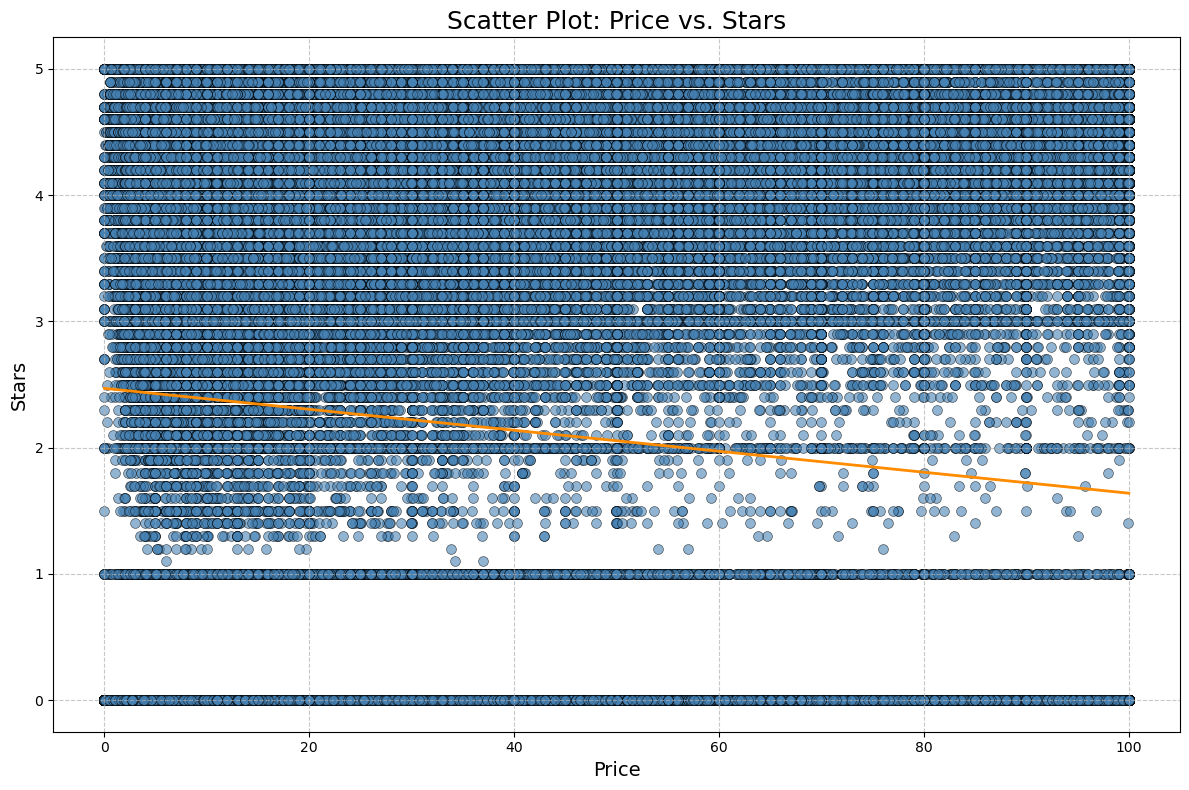

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Enhanced scatter plot
plt.scatter(
    df_no_outliers['price'], df_no_outliers['stars'],
    alpha=0.6, c='steelblue', edgecolor='black', linewidth=0.5, marker='o', s=50
)

# Adding a regression line to see the trend
sns.regplot(
    x='price', y='stars', data=df_no_outliers,
    scatter=False, color='darkorange', line_kws={"linewidth": 2}
)

plt.title('Scatter Plot: Price vs. Stars', fontsize=18)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Stars', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Correlation Heatmap

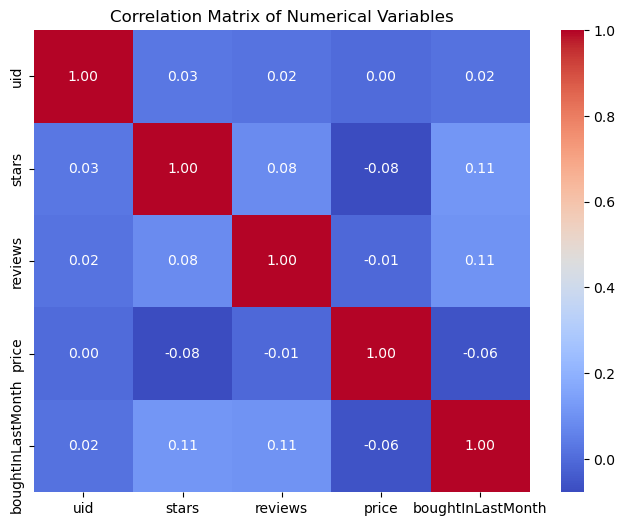

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns from the dataframe
numeric_cols = df_no_outliers.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix using only these columns
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Normality Check with a QQ Plot for Product Prices

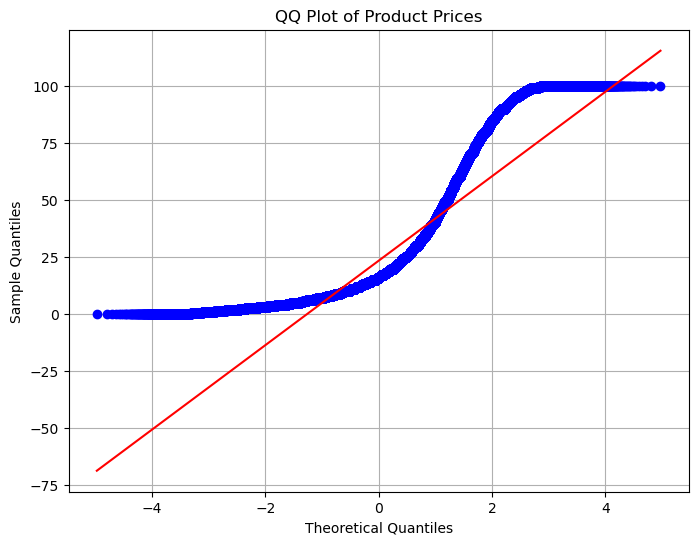

In [19]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()